For the exam, we will work with Perceptron algorithm as applied to binary class problem. We will work with the movie review dataset available here. http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

You can learn more about the dataset and the relevant paper here: http://www.cs.cornell.edu/people/pabo/movie-review-data/

There are two folders: positive and negative along with a readme file.

In [1]:
!wget -nv "http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"

2020-10-26 22:39:12 URL:http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz [3127238/3127238] -> "review_polarity.tar.gz" [1]


In [2]:
!tar -xvf review_polarity.tar.gz

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv013_10494.txt
txt_sentoken/neg/cv014_15600.txt
txt_sentoken/neg/cv015_29356.txt
txt_sentoken/neg/cv016_4348.txt
txt_sentoken/neg/cv017_23487.txt
txt_sentoken/neg/cv018_21672.txt
txt_sentoken/neg/cv019_16117.txt
txt_sentoken/neg/cv020_9234.txt
txt_sentoken/neg/cv021_17313.txt
txt_sentoken/neg/cv022_14227.txt
txt_sentoken/neg/cv023_13847.txt
txt_sentoken/neg/cv024_7033.txt
txt_sentoken/neg/cv025_29825.txt
txt_sentoken/neg/cv026_29229.txt
txt_sentoken/neg/cv027_26270.txt
txt_sentoken/neg/cv028_26964.txt
txt_sentoken/neg/cv029_19943.txt
txt_sentoken/n

In [1]:
import glob

In [2]:
pos = glob.glob('/content/txt_sentoken/pos/*.txt')
neg = glob.glob('/content/txt_sentoken/neg/*.txt')

In [3]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Files Preprocessing
data = pd.Series()
category = pd.Series()

for file_name in pos:
  msg = pd.Series(open(file_name,'r').read())
  cat = pd.Series(1)
  data = data.append(msg,ignore_index = True)
  category = category.append(cat,ignore_index = True)

text = pd.DataFrame({'Text':data,'Category':category})

In [5]:
data = pd.Series()
category = pd.Series()

for file_name in neg:
  msg = pd.Series(open(file_name,'r').read())
  cat = pd.Series(-1)
  data = data.append(msg,ignore_index = True)
  category = category.append(cat,ignore_index = True)

text = text.append(pd.DataFrame({'Text':data,'Category':category}),ignore_index = True)

In [6]:
text

,Text,Category
0,one fun activity for parents during the holida...,1
1,barely scrapping by playing at a nyc piano bar...,1
2,note : some may consider portions of the follo...,1
3,are you tired of all the hot new releases bein...,1
4,in my reviews i try to make gentle recommendat...,1
...,...,...
1995,topless women talk about their lives falls int...,-1
1996,* * * be warned . . . \nthe following review ...,-1
1997,one of the first films of 1999 is this mtv pic...,-1
1998,"and i thought "" stigmata "" would be the worst ...",-1


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#Cleaning words
all_words = (' '.join(text['Text'])).split()

In [9]:
nltk_stopwords = stopwords.words('english')
final_words = []

for word in all_words:
  if word.isalpha() and word not in nltk_stopwords and len(word) >=3:
    final_words.append(word)

You can use the top 1000 words as the features for training the classifier.

In [10]:
from collections import Counter
vocab = dict(Counter(final_words).most_common(1000))
vocab

{'film': 8849,
 'one': 5514,
 'movie': 5429,
 'like': 3543,
 'even': 2554,
 'good': 2313,
 'time': 2280,
 'story': 2110,
 'would': 2041,
 'much': 2022,
 'also': 1965,
 'get': 1920,
 'character': 1902,
 'two': 1824,
 'characters': 1813,
 'first': 1766,
 'see': 1726,
 'way': 1668,
 'well': 1654,
 'make': 1590,
 'really': 1556,
 'films': 1513,
 'little': 1487,
 'life': 1467,
 'plot': 1448,
 'people': 1418,
 'could': 1395,
 'scene': 1372,
 'bad': 1372,
 'never': 1360,
 'best': 1298,
 'new': 1275,
 'many': 1267,
 'scenes': 1262,
 'man': 1255,
 'know': 1207,
 'movies': 1180,
 'great': 1138,
 'another': 1111,
 'love': 1087,
 'action': 1073,
 'director': 1054,
 'something': 1047,
 'end': 1044,
 'still': 1037,
 'seems': 1032,
 'back': 1031,
 'made': 1025,
 'work': 1005,
 'makes': 991,
 'however': 986,
 'big': 967,
 'world': 958,
 'every': 945,
 'though': 936,
 'better': 914,
 'enough': 903,
 'seen': 902,
 'around': 896,
 'take': 892,
 'performance': 885,
 'audience': 878,
 'going': 871,
 'role'

In [11]:
def make_tokens(doc):
  '''
  Returns a list of tokens for a document.
  '''
  temp = doc.split()
  doc_tokens = []

  for token in temp:
    if token.isalpha() and token not in nltk_stopwords and len(token) >=3:
      doc_tokens.append(token)

  
  return doc_tokens

In [12]:
def get_feature_list(doc):
  '''
  Returns a list of features with 0/1 for a document if the word present in the vocab
  '''
  feature_list = []
  for word in vocab:
    if word in doc:
      feature_list.append(1)
    else:
      feature_list.append(0)

  return feature_list

In [13]:
text['Tokens'] = (text['Text']).apply(make_tokens)
text

,Text,Category,Tokens
0,one fun activity for parents during the holida...,1,"[one, fun, activity, parents, holidays, sugges..."
1,barely scrapping by playing at a nyc piano bar...,1,"[barely, scrapping, playing, nyc, piano, bar, ..."
2,note : some may consider portions of the follo...,1,"[note, may, consider, portions, following, tex..."
3,are you tired of all the hot new releases bein...,1,"[tired, hot, new, releases, gone, time, get, v..."
4,in my reviews i try to make gentle recommendat...,1,"[reviews, try, make, gentle, recommendations, ..."
...,...,...,...
1995,topless women talk about their lives falls int...,-1,"[topless, women, talk, lives, falls, category,..."
1996,* * * be warned . . . \nthe following review ...,-1,"[warned, following, review, contains, harsh, l..."
1997,one of the first films of 1999 is this mtv pic...,-1,"[one, first, films, mtv, pictures, release, ma..."
1998,"and i thought "" stigmata "" would be the worst ...",-1,"[thought, stigmata, would, worst, thriller, re..."


You are ready to split your dataset into training and testing sets. Create a training dataset by extracting 80% of the documents in each class (positive and negative). The rest of the 20% of the documents should be in the test dataset. Make sure that there is no overlap between the documents between training and test datasets. Never mix train and test datasets. It is cheating. You can use the train and test split function here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(text['Tokens'], text['Category'], test_size=0.20)

In [16]:
X_train_dummy = X_train.apply(get_feature_list)
X_train_dummy

627     [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, ...
1236    [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...
1268    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...
395     [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, ...
1405    [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...
                              ...                        
443     [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ...
1320    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...
1987    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, ...
771     [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, ...
1955    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: Tokens, Length: 1600, dtype: object

In [17]:
y_train

627     1
1236   -1
1268   -1
395     1
1405   -1
       ..
443     1
1320   -1
1987   -1
771     1
1955   -1
Name: Category, Length: 1600, dtype: int64

In [18]:
X_test_dummy = X_test.apply(get_feature_list)
X_test_dummy

992     [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, ...
27      [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, ...
1701    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
1585    [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...
565     [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, ...
                              ...                        
1518    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...
1283    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, ...
1083    [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, ...
163     [1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...
1885    [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...
Name: Tokens, Length: 400, dtype: object

In [19]:
y_test

992     1
27      1
1701   -1
1585   -1
565     1
       ..
1518   -1
1283   -1
1083   -1
163     1
1885   -1
Name: Category, Length: 400, dtype: int64

In [20]:
comb_df = pd.DataFrame(y_train).join(pd.DataFrame(X_train_dummy))
comb_df

,Category,Tokens
627,1,"[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, ..."
1236,-1,"[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."
1268,-1,"[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, ..."
395,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, ..."
1405,-1,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, ..."
...,...,...
443,1,"[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ..."
1320,-1,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ..."
1987,-1,"[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, ..."
771,1,"[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, ..."


Perceptron training algorithm (algorithm 5) is given in Chapter 4 of http://ciml.info/dl/v0_99/ciml-v0_99-ch04.pdf

In [21]:
import numpy as np

In [22]:
w = np.zeros(len(X_train_dummy.iloc[0]))

In [23]:
def perceptron_train(X_train,y_train,w):
  '''
  Trains the perceptron for the given data variables, X_train, y_train with initialised weights
  and returns the updated weights, bias and the loss of the training set. 
  '''
 #Initializations 
  b = 0
  doc_set_loss  = np.array([])

  for i in range(len(X_train)):
    a = (np.dot(w,X_train[i])) + b
    if y_train[i] * a <= 0:
      w = w + y_train[i] * np.array(X_train[i])
      b = b + y_train[i]
    
    #Calculating training loss for each doc in a set for an iteration
    loss_one_doc = max(0, -y_train[i] * a)
    doc_set_loss = np.append(doc_set_loss,loss_one_doc)
  
  return w,b,np.mean(doc_set_loss)

In [24]:
def perceptron_test(w,b,X_test,y_test):
  '''
  Returns the labels for the set of documents based on the weights obtained from the training.
  And returns the average testing loss. 
  +1 for positive document
  -1 for negative document
  '''
  y_pred = np.array([])
  docs_loss = np.array([])

  for i in range(len(X_test)):
    a = np.dot(w,X_test[i]) + b
    one_loss_doc = max(0,-y_test[i] * a)
    docs_loss = np.append(docs_loss,one_loss_doc)
    if a < 0:
      y_pred = np.append(y_pred,-1)
    elif a >= 0:
      y_pred = np.append(y_pred,1)
  
  return y_pred,np.mean(docs_loss)

In [25]:
#One Trail Run
w,b,avg_train_loss = perceptron_train(np.array(X_train_dummy),np.array(y_train),w)

In [26]:
#weights
w

array([  2.,   1.,  -2., -10.,  -1.,   5.,  -3.,   0.,  -2.,   2.,  16.,
         4.,  -4.,   0.,  -3.,  -1.,   8.,   3.,  12.,  -2.,   4.,  -5.,
        -4.,   8.,  -9.,   8., -13.,   2., -16.,  -6.,   6.,   4.,   3.,
        -3.,   3.,  -2.,   8.,   6.,  -6.,  -9.,  -7., -13.,  -2.,   8.,
         6., -16.,   2.,  -1.,  -5.,  10.,  -4.,   5.,   8.,   0.,  11.,
        -3.,   1.,   3.,  -6.,   1.,  -3.,  -9.,  -4.,  -4.,  -4.,   3.,
         0.,   5.,  10.,   0.,  -8.,  -7.,   2.,   1.,   3.,  -5., -10.,
        -2.,  -8.,  11.,  -3.,  -7.,   4.,   9.,   3.,  -7.,  -2., -21.,
        -3.,  -5.,   3.,   6.,   4.,   2.,  -3.,   5.,   4.,  -1.,   4.,
        -6.,   0.,  -6.,  -8.,  -6.,  -8.,   4.,   7.,  -4.,   1.,   2.,
        -5.,   0.,  -2.,   0.,  -7.,   0.,   1.,  10.,   0.,  -1.,   0.,
        -3.,  10.,   1.,   0.,  12.,  10.,   5.,   8.,   0.,  -9.,   3.,
         1.,   0.,   0.,   5.,  -9.,  -4.,   4.,   4.,  -1.,  -6.,   3.,
         6.,  -8.,  -1.,   0.,   0.,  -5.,  -3.,  -

In [27]:
#number of zero weights
len(w) - np.count_nonzero(w)

107

In [28]:
#bias
b

-6

In [29]:
#training loss
avg_train_loss

9.07

In [30]:
#predicting test variables based on the weights,bias obtained from one trail run

y_pred, avg_test_loss = perceptron_test(w,b,np.array(X_test_dummy),np.array(y_test))

In [31]:
y_pred

array([ 1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
        1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1

In [32]:
avg_test_loss

7.04

In [33]:
#calculating the accuracy
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [34]:
accuracy_score(np.array(y_test),y_pred)

0.7975

In [35]:
recall_score(np.array(y_test),y_pred)

0.7921348314606742

In [36]:
precision_score(np.array(y_test),y_pred)

0.7621621621621621

In [37]:
f1_score(np.array(y_test),y_pred)

0.7768595041322314

The loss for a document can be calculated as max(0,−ya) where y is the true label and a is the activation function for the perceptron in algorithm 5. You will find this formula here: https://scikit-learn.org/stable/modules/sgd.html (Links to an external site.) in section 1.5.7. The average training loss for a set of training documents is computed as the average of the losses over all the documents in the training dataset. 

In [38]:
X_train_dummy

627     [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, ...
1236    [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...
1268    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...
395     [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, ...
1405    [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...
                              ...                        
443     [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ...
1320    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...
1987    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, ...
771     [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, ...
1955    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: Tokens, Length: 1600, dtype: object

In [39]:
y_train

627     1
1236   -1
1268   -1
395     1
1405   -1
       ..
443     1
1320   -1
1987   -1
771     1
1955   -1
Name: Category, Length: 1600, dtype: int64

In [46]:
max_iter = 100

#Initializations
train_loss = np.array([])
test_loss = np.array([])
weights = np.zeros(len(X_train_dummy.iloc[0]))
f_score = np.array([])

for i in range(max_iter):

  w,b,one_train_loss = perceptron_train(np.array(X_train_dummy),np.array(y_train),weights)
  train_loss = np.append(train_loss,one_train_loss)
  
  y_pred,one_test_set_loss = perceptron_test(w,b,np.array(X_test_dummy),np.array(y_test))
  test_loss = np.append(test_loss,one_test_set_loss)

  f_score = np.append(f_score,f1_score(np.array(y_test),y_pred))

  #updating weights
  weights = w
  
  #shuffling the training data
  comb_df = comb_df.sample(frac = 1)
  X_train_dummy = comb_df['Tokens']
  y_train = comb_df['Category']


What is the average training loss at the end of each iteration? Can you report the average loss over iterations as a plot?

In [41]:
import matplotlib.pyplot as plt

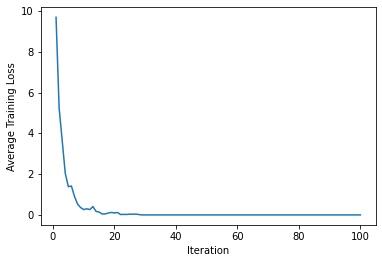

In [47]:
plt.plot(range(1,max_iter+1,1),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Average Training Loss')
plt.show()

Now, you can compute the average loss on the test dataset at the end of each iteration using the same procedure.
How did the average loss on the test dataset change with iterations? Is there any trend? Can you plot the loss values and check? What is the number of iterations at which the test loss stopped decreasing and started to increase?

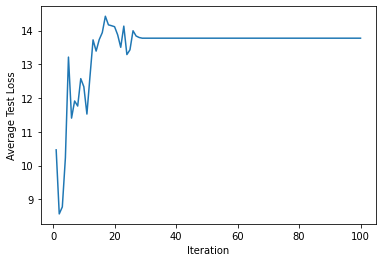

In [48]:
plt.plot(range(1,max_iter+1,1),test_loss)
plt.xlabel('Iteration')
plt.ylabel('Average Test Loss')
plt.show()

*Loss started to flatten out at around 27th iteration*

What is the performance of the classifier on the test dataset at the end of each iteration? How does the F-score change with respect to the loss?

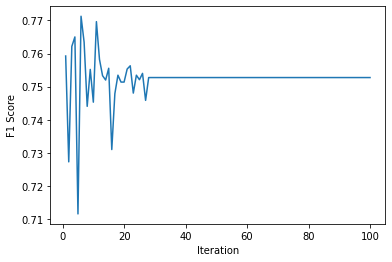

In [49]:
plt.plot(range(1,max_iter+1,1),f_score)
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.show()

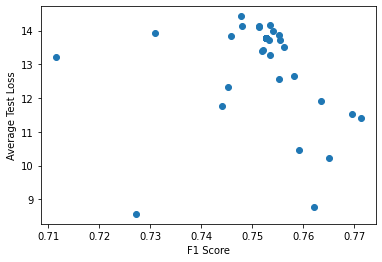

In [50]:
plt.scatter(f_score,test_loss)
plt.ylabel('Average Test Loss')
plt.xlabel('F1 Score')
plt.show()